## 6I

## 6Ia

In [251]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score

In [252]:
df = pd.read_csv("Q6.csv")

X = df[["0", "1"]]
y = df["2"]

In [253]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
}

In [254]:
linear_regression_threshold = 0
val_accuracy_scores = {model_name: None for model_name in models.keys()}
precision_scores = {model_name: None for model_name in models.keys()}
f1_scores = {model_name: None for model_name in models.keys()}
confusion_matrices = {model_name: None for model_name in models.keys()}
per_class_accuracies = {model_name: [] for model_name in models.keys()}

for name, model in models.items():
    model.fit(X_train, y_train)
    if name == "Linear Regression":
        y_val_pred = model.predict(X_val)
        y_val_pred = (y_val_pred > linear_regression_threshold).astype(int)
        y_test_pred = model.predict(X_test)
        y_test_pred = (y_test_pred > linear_regression_threshold).astype(int)
    else:
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_scores[name] = val_accuracy
    confusion_matrices[name] = confusion_matrix(y_val, y_val_pred)
    f1_scores[name] = f1_score(y_test, y_test_pred)
    for class_label in np.unique(y_val):
        class_indices = y_val == class_label
        class_accuracy = accuracy_score(y_val[class_indices], y_val_pred[class_indices])
        per_class_accuracies[name].append(class_accuracy)

print("Validation Accuracy Scores:")
for name, score in val_accuracy_scores.items():
    print(f"{name}: {score}")

Validation Accuracy Scores:
KNN: 0.996
Decision Tree: 0.994
Linear Regression: 0.383
Logistic Regression: 0.995


## 6Ib

This is a problem because in many real-world classification problems, the classes are not evenly distributed. For example, in fraud detection, disease diagnosis, or rare event detection, the majority of samples may belong to one class, while the other class represents a minority. In such cases, accuracy can be misleading because a model might achieve high accuracy by simply predicting the majority class for all instances, ignoring the minority class completely.

## 6Ic

Number of classes: 2
Class distribution:
2
0.0    9900
1.0     100
Name: count, dtype: int64


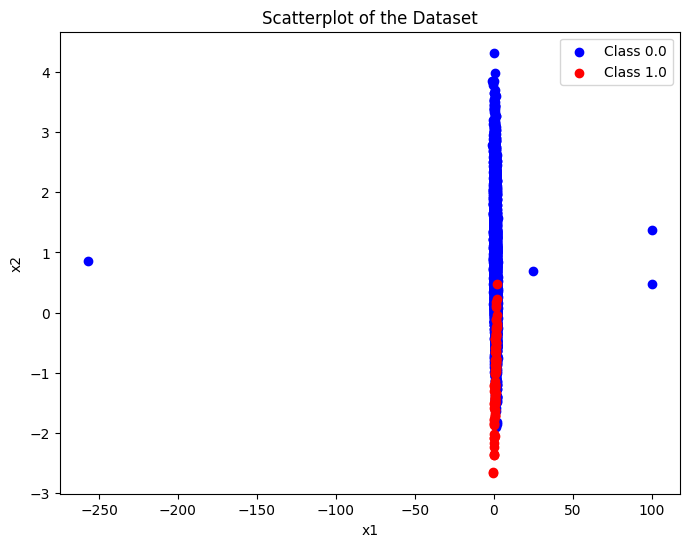

In [255]:
print("Number of classes:", df["2"].nunique())
print("Class distribution:")
print(df["2"].value_counts())

plt.figure(figsize=(8, 6))
colors = ["blue", "red"]
for class_label, color in zip(df["2"].unique(), colors):
    class_data = df[df["2"] == class_label]
    plt.scatter(
        class_data["0"], class_data["1"], color=color, label=f"Class {class_label}"
    )

plt.title("Scatterplot of the Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

The dataset consists of two classes. The class distribution reveals a significant class imbalance, with Class 0 comprising 9,900 samples and Class 1 containing only 100 samples. This imbalance suggests that Class 0 is heavily overrepresented compared to Class 1, which could potentially pose challenges in training machine learning models, particularly those sensitive to class distribution. 

## 6Id

In [256]:
for name, accuracies in per_class_accuracies.items():
    print(f"Per-class accuracies for {name}:")
    for i, class_accuracy in enumerate(accuracies):
        print(f"Class {i}: {class_accuracy}")

Per-class accuracies for KNN:
Class 0: 1.0
Class 1: 0.5
Per-class accuracies for Decision Tree:
Class 0: 0.9969758064516129
Class 1: 0.625
Per-class accuracies for Linear Regression:
Class 0: 0.3780241935483871
Class 1: 1.0
Per-class accuracies for Logistic Regression:
Class 0: 1.0
Class 1: 0.375


## 6Ie

In [257]:
for name, matrix in confusion_matrices.items():
    print(f"Confusion matrix for {name}:")
    print(matrix)
    print()

Confusion matrix for KNN:
[[992   0]
 [  4   4]]

Confusion matrix for Decision Tree:
[[989   3]
 [  3   5]]

Confusion matrix for Linear Regression:
[[375 617]
 [  0   8]]

Confusion matrix for Logistic Regression:
[[992   0]
 [  5   3]]



## 6If

Precision and recall are valuable in the presence of data imbalances because they provide insights into how well a model performs for each class, considering false positives and false negatives:

Precision measures the proportion of correctly predicted positive instances among all instances predicted as positive. It helps assess the model's ability to avoid falsely labeling negative instances as positive, crucial when misclassifying negative instances has a high cost.

Recall measures the proportion of correctly predicted positive instances among all actual positive instances. It evaluates the model's ability to capture positive instances from the entire population of positive instances, essential for minimizing false negatives and capturing all 

## 6Ig

In [258]:
for name, score in f1_scores.items():
    print(f"F1 score for {name}: {score}")

F1 score for KNN: 0.8333333333333334
F1 score for Decision Tree: 0.5555555555555556
F1 score for Linear Regression: 0.02127659574468085
F1 score for Logistic Regression: 0.7692307692307693


## 6Ih

In [259]:
class_counts = y_train.value_counts()
ratio = class_counts[0] / class_counts[1]

accuracy_results = []
precision_results = []
jump_percent = 0.2
jump = int(ratio * jump_percent) if int(ratio * jump_percent) else 1

i = 1
while class_counts[0] > class_counts[1] * i:
    current_ratio = class_counts[0] / (class_counts[1] * i)
    print(f"Current ratio: {round(current_ratio, 3)}")
    oversampler = RandomOverSampler(
        sampling_strategy={0: class_counts[0], 1: class_counts[1] * i}
    )
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

    knn = KNeighborsClassifier()
    knn.fit(X_resampled, y_resampled)
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    confusion = confusion_matrix(y_val, y_pred)
    accuracy_results.append(accuracy)
    precision_results.append(precision)

    print("KNN - Accuracy:", round(accuracy, 3), "Precision:", round(precision, 3))
    print("Confusion matrix:")
    for matrix in confusion:
        print(matrix)
    print()

    dt = DecisionTreeClassifier()
    dt.fit(X_resampled, y_resampled)
    y_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    confusion = confusion_matrix(y_val, y_pred)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    print(
        "Decision Tree - Accuracy:",
        round(accuracy, 3),
        "Precision:",
        round(precision, 3),
    )
    print("Confusion matrix:")
    for matrix in confusion:
        print(matrix)
    print()

    lr = LinearRegression()
    lr.fit(X_resampled, y_resampled)
    y_pred = lr.predict(X_val)
    y_pred = (y_pred > linear_regression_threshold).astype(int)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    confusion = confusion_matrix(y_val, y_pred)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    print(
        "Linear Regression - Accuracy:",
        round(accuracy, 3),
        "Precision:",
        round(precision, 3),
    )
    print("Confusion matrix:")
    for matrix in confusion:
        print(matrix)
    print()

    log_reg = LogisticRegression()
    log_reg.fit(X_resampled, y_resampled)
    y_pred = log_reg.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    confusion = confusion_matrix(y_val, y_pred)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    print(
        "Logistic Regression - Accuracy:",
        round(accuracy, 3),
        "Precision:",
        round(precision, 3),
    )
    print("Confusion matrix:")
    for matrix in confusion:
        print(matrix)
    print()
    i += jump


best_accuracy = max(accuracy_results)
best_precision = max(precision_results)

print("Best Accuracy:", best_accuracy)
print("Best Precision:", best_precision)

Current ratio: 93.118
KNN - Accuracy: 0.996 Precision: 1.0
Confusion matrix:
[992   0]
[4 4]

Decision Tree - Accuracy: 0.995 Precision: 0.714
Confusion matrix:
[990   2]
[3 5]

Linear Regression - Accuracy: 0.383 Precision: 0.013
Confusion matrix:
[375 617]
[0 8]

Logistic Regression - Accuracy: 0.995 Precision: 1.0
Confusion matrix:
[992   0]
[5 3]

Current ratio: 4.901
KNN - Accuracy: 0.985 Precision: 0.294
Confusion matrix:
[980  12]
[3 5]

Decision Tree - Accuracy: 0.993 Precision: 0.556
Confusion matrix:
[988   4]
[3 5]

Linear Regression - Accuracy: 0.364 Precision: 0.012
Confusion matrix:
[356 636]
[0 8]

Logistic Regression - Accuracy: 0.97 Precision: 0.211
Confusion matrix:
[962  30]
[0 8]

Current ratio: 2.517
KNN - Accuracy: 0.985 Precision: 0.294
Confusion matrix:
[980  12]
[3 5]

Decision Tree - Accuracy: 0.993 Precision: 0.556
Confusion matrix:
[988   4]
[3 5]

Linear Regression - Accuracy: 0.35 Precision: 0.012
Confusion matrix:
[342 650]
[0 8]

Logistic Regression - Ac

Based on the provided results, it seems that the Decision Tree model performs
better in terms of both accuracy and precision at most sampling ratios. For
oversampling, the initial ratio of 93.118 i.e. no oversampling, performs the best.

## 6Ii

In [260]:
accuracy_results = []
precision_results = []

i = 1
while int(class_counts[0] * 1 / i) > class_counts[1]:
    current_ratio = int(class_counts[0] * 1 / i) / (class_counts[1])
    print(f"Current ratio: {round(current_ratio, 3)}")
    undersampler = RandomUnderSampler(
        sampling_strategy={0: int(class_counts[0] * 1 / i), 1: class_counts[1]}
    )
    X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

    knn = KNeighborsClassifier()
    knn.fit(X_resampled, y_resampled)
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    confusion = confusion_matrix(y_val, y_pred)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    print("KNN - Accuracy:", round(accuracy, 3), "Precision:", round(precision, 3))
    print("Confusion matrix:")
    for matrix in confusion:
        print(matrix)
    print()

    dt = DecisionTreeClassifier()
    dt.fit(X_resampled, y_resampled)
    y_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    confusion = confusion_matrix(y_val, y_pred)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    print(
        "Decision Tree - Accuracy:",
        round(accuracy, 3),
        "Precision:",
        round(precision, 3),
    )
    print("Confusion matrix:")
    for matrix in confusion:
        print(matrix)
    print()

    lr = LinearRegression()
    lr.fit(X_resampled, y_resampled)
    y_pred = lr.predict(X_val)
    y_pred = (y_pred > linear_regression_threshold).astype(int)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    confusion = confusion_matrix(y_val, y_pred)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    print(
        "Linear Regression - Accuracy:",
        round(accuracy, 3),
        "Precision:",
        round(precision, 3),
    )
    print("Confusion matrix:")
    for matrix in confusion:
        print(matrix)
    print()

    log_reg = LogisticRegression()
    log_reg.fit(X_resampled, y_resampled)
    y_pred = log_reg.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    confusion = confusion_matrix(y_val, y_pred)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    print(
        "Logistic Regression - Accuracy:",
        round(accuracy, 3),
        "Precision:",
        round(precision, 3),
    )
    print("Confusion matrix:")
    for matrix in confusion:
        print(matrix)
    print()

    i += jump

best_accuracy = max(accuracy_results)
best_precision = max(precision_results)

print("Best Accuracy:", best_accuracy)
print("Best Precision:", best_precision)

Current ratio: 93.118
KNN - Accuracy: 0.996 Precision: 1.0
Confusion matrix:
[992   0]
[4 4]

Decision Tree - Accuracy: 0.995 Precision: 0.667
Confusion matrix:
[989   3]
[2 6]

Linear Regression - Accuracy: 0.383 Precision: 0.013
Confusion matrix:
[375 617]
[0 8]

Logistic Regression - Accuracy: 0.995 Precision: 1.0
Confusion matrix:
[992   0]
[5 3]

Current ratio: 4.894
KNN - Accuracy: 0.968 Precision: 0.184
Confusion matrix:
[961  31]
[1 7]

Decision Tree - Accuracy: 0.955 Precision: 0.122
Confusion matrix:
[949  43]
[2 6]

Linear Regression - Accuracy: 0.366 Precision: 0.012
Confusion matrix:
[358 634]
[0 8]

Logistic Regression - Accuracy: 0.972 Precision: 0.222
Confusion matrix:
[964  28]
[0 8]

Current ratio: 2.506
KNN - Accuracy: 0.945 Precision: 0.127
Confusion matrix:
[937  55]
[0 8]

Decision Tree - Accuracy: 0.953 Precision: 0.145
Confusion matrix:
[945  47]
[0 8]

Linear Regression - Accuracy: 0.402 Precision: 0.013
Confusion matrix:
[394 598]
[0 8]

Logistic Regression - 

Based on the provided results, it seems that the Decision Tree model performs
better in terms of both accuracy and precision at most lower ratios but for
higher ratios, Logistic regression performs the best. For
undersampling, the initial ratio of 93.118 i.e. no undersampling, performs the best.

## 6II

## 6IIa

By inspection of the dataset feature x1 of Class 0 has a few outliers. A good
approach to dealing with them would be to identify and remove from the dataset
using the z-score for each data point in feature x1, which quantifies how many
standard deviations the data point is away from the mean of the feature.
Following this, a threshold value is set, say, t=3, indicating that any data point with a z-score greater than 3 or less than -3 is considered an outlier. Subsequently, outliers are identified by filtering out data points that exceed the threshold.

## 6IIb

In [261]:
k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_val_pred = knn.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)

    cm = confusion_matrix(y_val, y_val_pred)

    print(f"KNN with k={k}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(cm)
    print()

KNN with k=1:
Accuracy: 0.99
Confusion Matrix:
[[986   6]
 [  4   4]]

KNN with k=3:
Accuracy: 0.997
Confusion Matrix:
[[992   0]
 [  3   5]]

KNN with k=5:
Accuracy: 0.996
Confusion Matrix:
[[992   0]
 [  4   4]]



Outliers may not be a problem for KNN when:
- Outliers are located far away from the majority of data points: If outliers are located in regions of the feature space where there are few or no other data points, they will have minimal impact on the nearest neighbor calculations and, therefore, on the classification decision made by KNN.

- Outliers are correctly classified: If outliers are correctly classified by KNN based on the majority of their nearest neighbors, they will not affect the overall accuracy of the algorithm significantly.

Outliers may be a problem for KNN when:
- Outliers are located near the decision boundary: If outliers are situated close to the decision boundary between two or more classes, they can significantly influence the classification decision of KNN by pulling the decision boundary towards them, leading to misclassification of neighboring data points.

- Outliers are incorrectly labeled: If outliers are incorrectly labeled or represent noise in the dataset, they can introduce bias into the KNN algorithm, causing it to make erroneous predictions based on the erroneous labels associated with the outliers.

## 6IIc

In [262]:
max_depths = [1, 2, 3]

for max_depth in max_depths:
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=123123)
    dt_classifier.fit(X_train, y_train)

    y_val_pred = dt_classifier.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)

    cm = confusion_matrix(y_val, y_val_pred)

    print(f"Decision Tree Classifier with max depth = {max_depth}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(cm)
    print()

Decision Tree Classifier with max depth = 1:
Accuracy: 0.994
Confusion Matrix:
[[990   2]
 [  4   4]]

Decision Tree Classifier with max depth = 2:
Accuracy: 0.996
Confusion Matrix:
[[992   0]
 [  4   4]]

Decision Tree Classifier with max depth = 3:
Accuracy: 0.996
Confusion Matrix:
[[992   0]
 [  4   4]]



Outliers would not be a problem for KNN when:
- They are located far away from the majority of data points.
- They do not fall within the neighborhood of any other data points.
- Their influence on nearest neighbor calculations is minimal.

Outliers would be a problem for KNN when:
- They are situated near the decision boundary between different classes.
- They distort the neighborhood relationships and pull the decision boundary toward them.
- They introduce bias into the classification process by being incorrectly labeled or representing noise in the dataset.

## 6IId

Decision trees are generally less impervious to outliers compared to KNNs because outliers can significantly affect the structure and decision boundaries of the tree, leading to overfitting. KNN, on the other hand, tends to be more robust to outliers as their influence diminishes with an increasing number of neighbors and their impact is localized to the vicinity of the query point.

## 6III


In the realm of real-world data, the challenges extend beyond imbalanced datasets and outliers. One significant issue lies in missing values, which are common occurrences and can introduce biases, compromise model effectiveness, and lead to inaccurate predictions if not handled meticulously. Data quality is another essential consideration, encompassing noise, inconsistencies, errors, and duplicates that can significantly impact model accuracy. Furthermore, high-dimensional data can exacerbate overfitting and computational complexity, warranting dimensionality reduction techniques to retain essential information while reducing the feature space. Finally, temporal dependencies in time-series or sequential data must be considered, as overlooking such dependencies can result in erroneous predictions and subpar model performance.